In [10]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

import koreanize_matplotlib
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline

# Q1

<Axes: ylabel='시도명'>

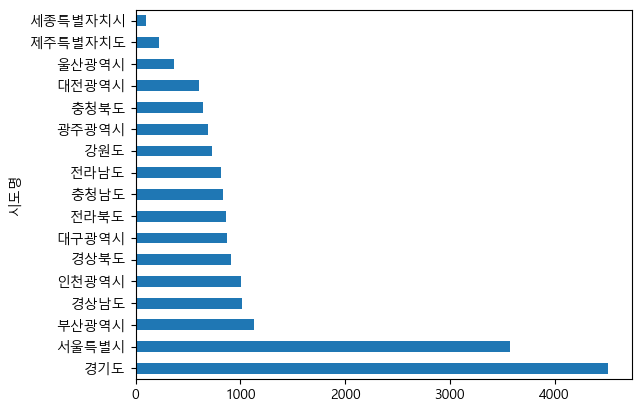

In [12]:
df_phar = df[df['상권업종소분류명'] == '약국'].copy()
q1 = df_phar['시도명'].value_counts()
q1.plot.barh()

# Q2

<Axes: ylabel='시도명'>

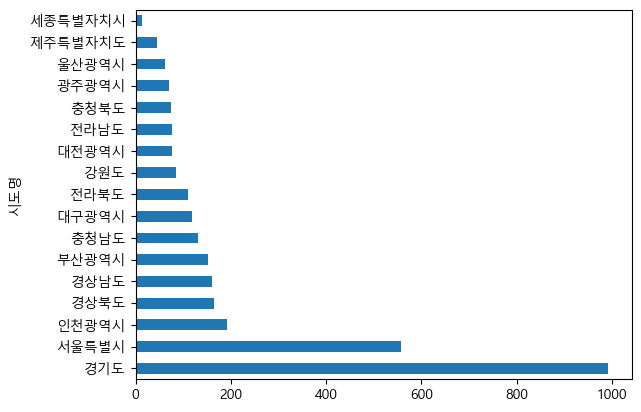

In [13]:
df_ani = df[df['상권업종소분류명'] == '동물병원'].copy()
q2 = df_ani['시도명'].value_counts()
q2.plot.barh()

# Q3

<Axes: ylabel='시군구명'>

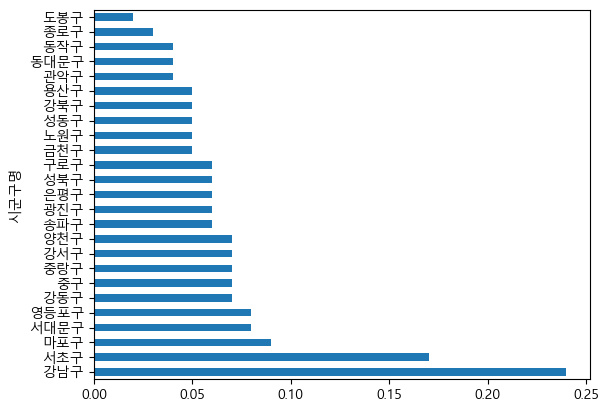

In [17]:
df_ss = df[(df['상권업종소분류명'].str.contains('피부|성형')) &
           (df['시도명'] == '서울특별시')].copy()
df_hospital = df[(df['상권업종중분류명'] == '병원') &
                 (df['시도명'] == '서울특별시')].copy()
df_hospital_count = df_hospital['시군구명'].value_counts()
df_ss_count = df_ss['시군구명'].value_counts()

q3 = (df_ss_count/df_hospital_count).sort_values(ascending=False).round(2)
q3.plot.barh()

# Q4

In [9]:
import folium
df_hos = df[(df['상권업종소분류명'] == '노인/치매병원')].copy()
lat = df_hos['위도'].mean()
lon = df_hos['경도'].mean()
map = folium.Map(location=[lat,lon], zoom_start=6)

for n in df_hos.index:
    name = df_hos.loc[n, '상호명']
    address = df_hos.loc[n, '도로명주소']
    popup = f'{name}-{address}'
    location = [df_hos.loc[n, '위도'], df_hos.loc[n, '경도']]

    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map